# Assessing Calibration Ranges of models
- This notebook shows how users can plot their data amonst the calibration range of different models to assess whether they are within the calibration range
- You can download the excel spreadsheet here: 

In [1]:
# First, load various python things. If you haven't installed Thermobar do so now
# by removing the # next to !pip install

#!pip install Thermobar
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Load in data from your system 
- in this case some pyroxene, amphibole and liquid data. 

In [21]:
out=pt.import_excel('Example_Liq_Px_Amp.xlsx', sheet_name="Liquid")
Liquids1=out['Liqs']

out2=pt.import_excel('Example_Liq_Px_Amp.xlsx', sheet_name="Pyroxene")
Cpxs1=out2['Cpxs']

out3=pt.import_excel('Example_Liq_Px_Amp.xlsx', sheet_name="Amphibole")
Amps1=out3['Amps']

C:\Users\penny\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Step 2: The two ways to use these functions
- You have two options, you can either use the function "return_cali_dataset" which will return the calibration dataset of each model so you can make whatever plots you want. 
- Or, you can use the prebuilt plotting function "generic_cali_plot" which allows you to specify a model, and an x and y paramter, and will make the plot for you.
- You can see the different options using the help function
- We will add as many calibratoin datasets as we can find - if you have one, please reach out! So far, the supported ones are listed here under "model" for each phase

In [3]:
help(pt.generic_cali_plot)

Help on function generic_cali_plot in module Thermobar.calibration_plots:

generic_cali_plot(df, model=None, x=None, y=None, P_kbar=None, T_K=None, figsize=(7, 5), shape_cali='o', mfc_cali='white', mec_cali='k', ms_cali=5, shape_data='^', mfc_data='red', alpha_cali=1, alpha_data=1, mec_data='k', ms_data=10, order='cali bottom', save_fig=False, fig_name=None, dpi=200)
    This function plots your compositions amongst the calibration dataset for a variety of models where we could
    obtain the exact calibration dataset. see model for option.
    
    Parameters
    -------
    
    df: pandas DataFrame
        dataframe of your compositions, e.g. a dataframe of Cpx composition
    
    x and y: str
        What you want to plotted against each other. E.g. x="SiO2_Cpx", y="Al2O3_Cpx"
    
    model: str
        AMPHIBOLE:
        Ridolfi2021:  Ridolfi et al. (2012)
        Putirka2016:  Putirka (2016)
        Mutch2016: Mutch et al. (2016)
        Zhang2017: Zhang et al. (2017)
    
    

## Example 1 - Amphibole

#### Example 1a- First, lets use the prebuilt plot functions

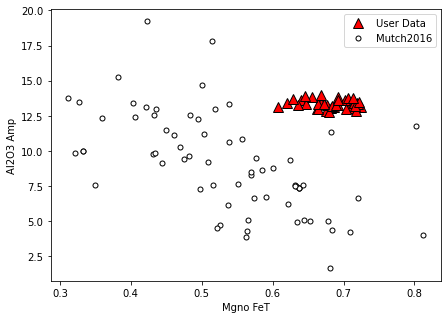

In [4]:
## Example in manuscript - v simple
a=pt.generic_cali_plot(df=Amps1, model="Mutch2016",
        x='Mgno_FeT', y='Al2O3_Amp')
a.savefig('Cali_plot_amphibole.png', dpi=200)

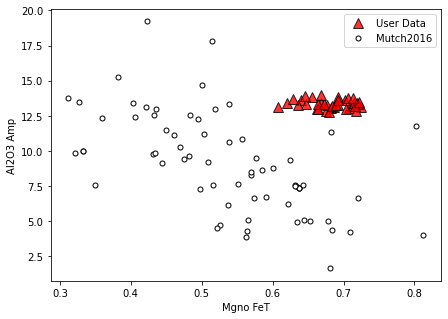

In [5]:
# Here we specify we want mutch, that we want calibration data 
# on the bottom, and alpha (Transparency) at 80% for our data
a=pt.generic_cali_plot(df=Amps1, model="Mutch2016",
        x='Mgno_FeT', y='Al2O3_Amp',  order="cali bottom", 
                       alpha_cali=1, alpha_data=0.8)

### Here we specify we want mutch, that we want calibration data on the bottom, and alpha (Transparency) at 80% for our data

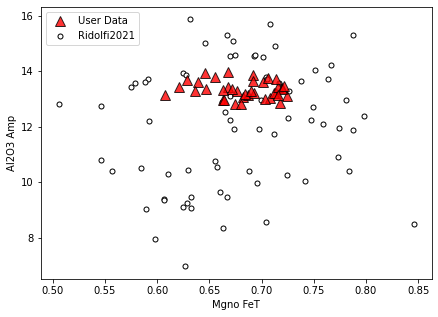

In [6]:


a=pt.generic_cali_plot(df=Amps1, model="Ridolfi2021",
        x='Mgno_FeT', y='Al2O3_Amp',  order="cali bottom", 
                       alpha_cali=1, alpha_data=0.8)

#### Example 1b: lets load the calibration datasets for Mutch and Ridolfi

In [7]:
Cali_Dataset_Mutch=pt.return_cali_dataset(model="Mutch2016")
Cali_Dataset_Ridolfi=pt.return_cali_dataset(model="Ridolfi2021")

- Now we can use matplotlib to make whatever plot we want

Text(0, 0.5, 'MgO Amp')

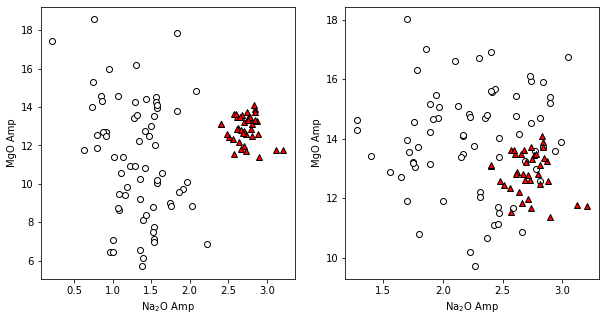

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Cali_Dataset_Mutch['Na2O_Amp'], Cali_Dataset_Mutch['MgO_Amp'], 
         'ok', mfc='white')
ax1.plot(Amps1['Na2O_Amp'], Amps1['MgO_Amp'], '^k', mfc='red')
ax1.set_xlabel('Na$_2$O Amp')
ax1.set_ylabel('MgO Amp')


ax2.plot(Cali_Dataset_Ridolfi['Na2O_Amp'], Cali_Dataset_Ridolfi['MgO_Amp'], 
         'ok', mfc='white')
ax2.plot(Amps1['Na2O_Amp'], Amps1['MgO_Amp'], '^k', mfc='red')
ax2.set_xlabel('Na$_2$O Amp')
ax2.set_ylabel('MgO Amp')

#### Example 1c - What if we want to compare pressures and temperatures to the cali dataset?
- First, we need to calculate the P and Ts using the equations. 

In [9]:
P_Mutch=pt.calculate_amp_only_press(amp_comps=Amps1, equationP="P_Mutch2016")
P_Ridolfi=pt.calculate_amp_only_press_temp(amp_comps=Amps1, 
                                           equationP="P_Ridolfi2021",
                                          equationT="T_Ridolfi2012")

- Now we can use the generic plot function to add the P_kbar onto the dataframe

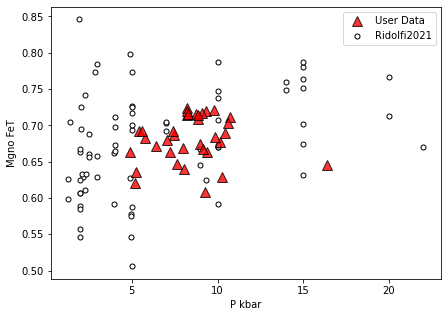

In [10]:
a=pt.generic_cali_plot(df=Amps1, model="Ridolfi2021",
        x='P_kbar', y='Mgno_FeT', P_kbar=P_Ridolfi['P_kbar_calc'],
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.8)

- Or, for Ridolfi, plot pressure and temperature

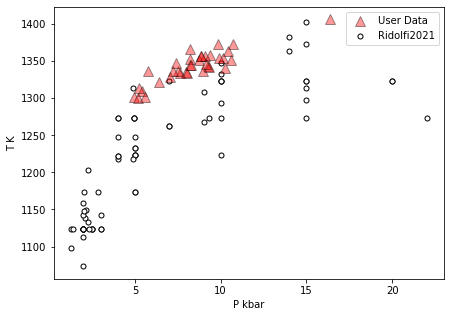

In [11]:
a=pt.generic_cali_plot(df=Amps1, model="Ridolfi2021",
        x='P_kbar', y='T_K', P_kbar=P_Ridolfi['P_kbar_calc'],
                       T_K=P_Ridolfi['T_K_calc'],
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.4)

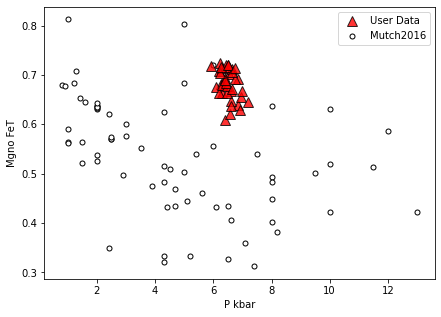

In [12]:
a=pt.generic_cali_plot(df=Amps1, model="Mutch2016",
        x='P_kbar', y='Mgno_FeT', P_kbar=P_Mutch['P_kbar_calc'],
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.8)

## Example 2 - Cpx

#### Example 2a: Loading the various calibration datasets, making plots using mpl

In [13]:
Brugman_Cali=pt.return_cali_dataset(model='Brugman2019')
Petrelli_Cali=pt.return_cali_dataset(model='Petrelli2020')
Neave_Cali=pt.return_cali_dataset(model='Neave2017')
Masotta_Cali=pt.return_cali_dataset(model='Masotta2013')
# And calculate Cpx components for loaded cpx
input_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs1)

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Text(0, 0.5, 'T_K')

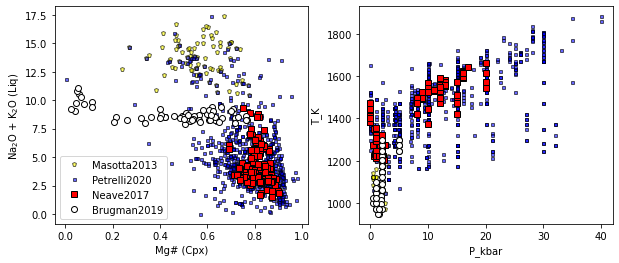

In [14]:
## Lets have a look at these
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Masotta_Cali['Mgno_Cpx'], 
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=5, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'], 
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.6, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'], 
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', label='Neave2017')

ax1.plot(Brugman_Cali['Mgno_Cpx'], 
         Brugman_Cali['Na2O_Liq']+Brugman_Cali['K2O_Liq'],
         'ok', mfc='white', label='Brugman2019')
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')

y2='T_K'
x2='P_kbar'

ax2.plot(Masotta_Cali[x2], 
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=5, alpha=0.6, label='Masotta2013')

ax2.plot(Petrelli_Cali[x2], 
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, alpha=0.6, label='Petrelli2020')

ax2.plot(Neave_Cali[x2], 
         Neave_Cali[y2],
         'sk', mfc='red', label='Neave2017')

ax2.plot(Brugman_Cali[x2], 
         Brugman_Cali[y2],
         'ok', mfc='white', label='Brugman2019')

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)

#### Example 2b: Using built in functions for plotting

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


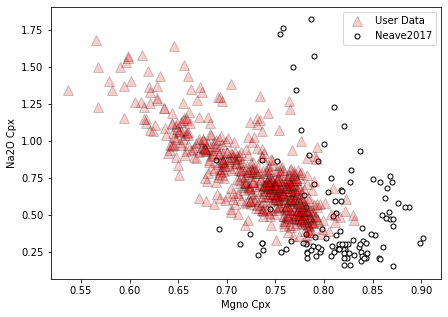

In [15]:
a=pt.generic_cali_plot(df=Cpxs1, model="Neave2017",
        x='Mgno_Cpx', y='Na2O_Cpx',
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.2)

- Lets say calculate P and T, then make plots with that

In [16]:
PT_Pet20=pt.calculate_cpx_only_press_temp(cpx_comps=Cpxs1, equationP="P_Petrelli2020_Cpx_only",
                                            equationT="T_Petrelli2020_Cpx_only")

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Youve selected a T-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


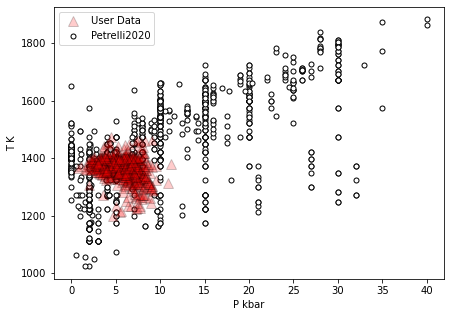

In [17]:
a=pt.generic_cali_plot(df=Cpxs1, model="Petrelli2020",
        x='P_kbar', y='T_K', P_kbar=PT_Pet20['P_kbar_calc'],
                       T_K=PT_Pet20['T_K_calc'],
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.2)

## Example 3 - Assessing matched liquid - Cpx pairs

In [18]:
# First, lets calculate matched Cpx-Liq pairs. 
cpx_liq_out=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=Cpxs1, liq_comps=Liquids1, 
                                                     equationT="T_Mas2013_Talk2012",
                                                     equationP="P_Mas2013_Palk2012")
all_matches=cpx_liq_out['All_PTs']
av_matches=cpx_liq_out['Av_PTs']

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=574 Cpx & N=51 Liqs, which is a total of N=29274 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
2207 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1244 Cpx-Liq matches using the specified filter. N=358 Cpx out of the N=574 Cpx that you input matched to 1 or more liquids


### Lets plot them ontop of the previous figures

Text(0, 0.5, 'T_K')

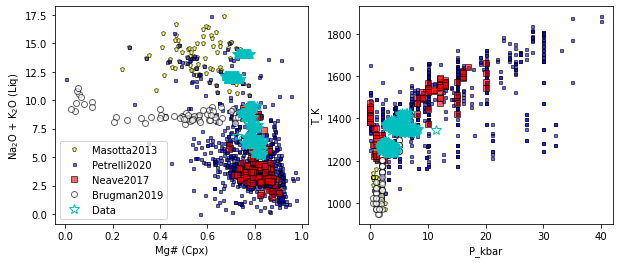

In [19]:
## Lets have a look at these
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Masotta_Cali['Mgno_Cpx'], 
         Masotta_Cali['Na2O_Liq']+Masotta_Cali['K2O_Liq'],
         'pk', mfc='yellow', ms=5, alpha=0.6, label='Masotta2013')

ax1.plot(Petrelli_Cali['Mgno_Cpx'], 
         Petrelli_Cali['Na2O_Liq']+Petrelli_Cali['K2O_Liq'],
         'sk', mfc='blue', ms=3, alpha=0.6, label='Petrelli2020')

ax1.plot(Neave_Cali['Mgno_Cpx'], 
         Neave_Cali['Na2O_Liq']+Neave_Cali['K2O_Liq'],
         'sk', mfc='red', label='Neave2017', alpha=0.6)

ax1.plot(Brugman_Cali['Mgno_Cpx'], 
         Brugman_Cali['Na2O_Liq']+Brugman_Cali['K2O_Liq'],
         'ok', mfc='white', label='Brugman2019', alpha=0.6)

ax1.plot(all_matches['Mgno_Cpx'],  all_matches['Na2O_Liq']+all_matches['K2O_Liq'],
         '*c', ms=10, mfc='None', label='Data', alpha=1)
# Then calc
ax1.legend()
ax1.set_xlabel('Mg# (Cpx)')
ax1.set_ylabel('Na$_2$O + K$_2$O (Liq)')

y2='T_K'
x2='P_kbar'

ax2.plot(Masotta_Cali[x2], 
         Masotta_Cali[y2],
         'pk', mfc='yellow', ms=5,  label='Masotta2013', alpha=0.6)

ax2.plot(Petrelli_Cali[x2], 
         Petrelli_Cali[y2],
         'sk', mfc='blue', ms=3, label='Petrelli2020', alpha=0.6)

ax2.plot(Neave_Cali[x2], 
         Neave_Cali[y2],
         'sk', mfc='red', label='Neave2017', alpha=0.6)

ax2.plot(Brugman_Cali[x2], 
         Brugman_Cali[y2],
         'ok', mfc='white', label='Brugman2019', alpha=0.6)

ax2.plot( all_matches['P_kbar_calc'],all_matches['T_K_calc'], 
         '*c', ms=10, mfc='None', label='Data', alpha=1)

ax2.set_xlabel(x2)
ax2.set_ylabel(y2)

### Or you can plot on little diagram

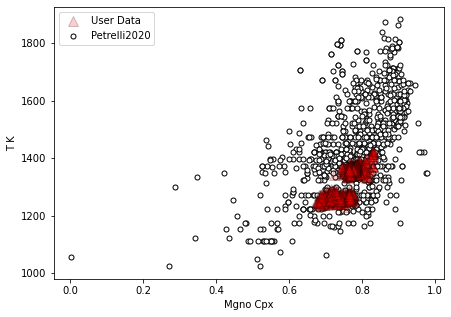

In [20]:
a=pt.generic_cali_plot(df=all_matches, model="Petrelli2020",
        x='Mgno_Cpx', y='T_K', P_kbar=all_matches['P_kbar_calc'],
                       T_K=all_matches['T_K_calc'],
                       order="cali bottom", 
                       alpha_cali=1, alpha_data=0.2)

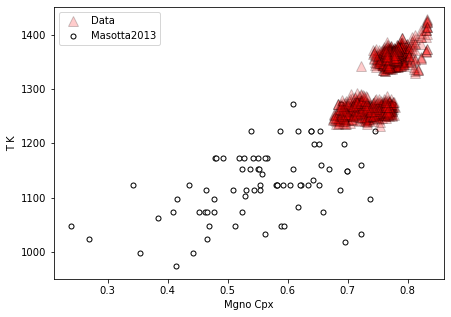

In [20]:
a=pt.generic_cali_plot(df=all_matches, model="Masotta2013",
        x='Mgno_Cpx', y='T_K', 
        T_K=all_matches['T_K_calc'],
        order="cali bottom", 
        alpha_cali=1, alpha_data=0.2)